# Problem Statement -:
## Sentiment Analysis on Amazon Product "realme Narzo 50 Pro 5G" Reviews.

About realme Narzo 50 Pro 5G -:

This 5G smart phone was announced on May,18,2022.The phone has 5G network connectivity with GSM,HSPA,LTE Technology as well.Phone has memory storage of 128GB 6GB RAM, 128GB 8GB RAM & have Android 12 OS with Camera of HDR Panorama 48,8,2 MP tripple lense.The price in amazon is INR'21,99'.(Source:https://www.gsmarena.com/)

Sentiment Analysis on realme Narzo 50 Pro 5G : After launching this phone the phone is available for sale on popular e-commerce websites like amazon,flipcart etc. Their user & smartphone lover put their views & comparison on this platform, here we do the sentiment analysis based on their reviews submitted by the users for this product at amazon india.

About the dataset-First need to extract the data from the website necessary method has been followed.The data set is all about the each and every aspect of phone specifications & price comparision with its durability in terms of the reviews given by the users.Let have a look what people are say about this phone are they higly like it, or not or they have an neutral feelings about the product.


In [367]:
# Improting some basic libraries
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

# Web Page Scraping

In [9]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    
    # Requests sorts cookies= alphabetically
    
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
   
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/realme-Storage-Dimensity-Processor-Display/dp/B09ZBG7J7F/?_encoding=UTF8&pd_rd_i=B09ZBG7J7F&pd_rd_w=NfmEw&content-id=amzn1.sym.8f140b5a-c3b9-4ad8-94f0-98f0f6fe96a3&pf_rd_p=8f140b5a-c3b9-4ad8-94f0-98f0f6fe96a3&pf_rd_r=NKZCWWASW0E5TGXBB1S3&pd_rd_wg=KGwTB&pd_rd_r=98828c60-2e39-4d7b-8057-dfefb6d7675f&ref_=dtdpp50' ,
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

# Apply to Working function

In [10]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [11]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [12]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [13]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\VivekG\AppData\Local\Temp\ipykernel_1764\965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

# Save results to a dataframe

In [21]:

DF = pd.DataFrame(reviewlist)
DF

,Rating,Title,Review,Review_Date
0,4.0,Product is slim and good.,Overall Product is really good. But I've issue...,25 October 2022
1,4.0,Super mobile,Mobile super good performance mostly branding ...,28 October 2022
2,4.0,SUPERPHONE,The camera quality is very good,29 October 2022
3,4.0,Nice Phone👍👍,Overall phone is very goodCamera quality also ...,29 October 2022
4,4.0,Decent for Normal Daily Use. Not for Gaming Pu...,(Note- I have purchased this phone on the Even...,16 October 2022
...,...,...,...,...
4995,1.0,Non statisfactory Product,1.Its getting too much hot while shooting pics...,Reviewed in India 🇮🇳 on 29 June 2022
4996,2.0,Worst battery,Battery discharging quickly. Not even 24 hours,Reviewed in India 🇮🇳 on 30 April 2022
4997,2.0,Battery backup is worst,Battery backup worst,Reviewed in India 🇮🇳 on 11 May 2022
4998,2.0,Product is not bad,"Phone hang and slow , camera quality is not ba...",Reviewed in India 🇮🇳 on 12 April 2022


# Extratct the data set to CSV 

In [17]:
DF.to_csv('C:/Users/VivekG/Desktop/My Files- Vivek/ExcelrThane/DS/Assignments/Txt Mining/Amazon_Reviews_realme Narzo 50 Pro 5G.csv')

In [368]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import nltk
from string import punctuation
from nltk.stem.porter import *

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

%matplotlib inline


from wordcloud import WordCloud, STOPWORDS

from matplotlib.pyplot import imread

from textblob import TextBlob


from string import punctuation
from nltk.stem.porter import *

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer



# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VivekG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt 

# Load The Data

In [369]:
reviews_amzn=pd.read_csv('C:/Users/VivekG/Desktop/My Files- Vivek/ExcelrThane/DS/Assignments/Txt Mining/Amazon_Reviews_realme Narzo 50 Pro 5G.csv')

reviews_amzn = reviews_amzn.loc[:, ~reviews_amzn.columns.str.contains('^Unnamed')]

reviews_amzn.head()

,Sr.No,Rating,Title,Review,Review_Date
0,0,4,Product is slim and good.,Overall Product is really good. But I've issue...,25 October 2022
1,1,4,Super mobile,Mobile super good performance mostly branding ...,28 October 2022
2,2,4,SUPERPHONE,The camera quality is very good,29 October 2022
3,3,4,Nice Phone👍👍,Overall phone is very goodCamera quality also ...,29 October 2022
4,4,4,Decent for Normal Daily Use. Not for Gaming Pu...,(Note- I have purchased this phone on the Even...,16 October 2022


# EDA

In [370]:
# Removing Sr no column
reviews_amzn.drop(['Sr.No'],inplace=True,axis=1)
reviews_amzn.head()

,Rating,Title,Review,Review_Date
0,4,Product is slim and good.,Overall Product is really good. But I've issue...,25 October 2022
1,4,Super mobile,Mobile super good performance mostly branding ...,28 October 2022
2,4,SUPERPHONE,The camera quality is very good,29 October 2022
3,4,Nice Phone👍👍,Overall phone is very goodCamera quality also ...,29 October 2022
4,4,Decent for Normal Daily Use. Not for Gaming Pu...,(Note- I have purchased this phone on the Even...,16 October 2022


In [371]:
reviews_amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       5000 non-null   int64 
 1   Title        5000 non-null   object
 2   Review       4685 non-null   object
 3   Review_Date  4995 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [372]:
reviews_amzn.describe()

,Rating
count,5000.000000
mean,4.226000
std,1.071613
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [373]:
# Number of Word in a single Review.

reviews_amzn['word_count'] = reviews_amzn['Review'].apply(lambda x: len(str(x).split(" ")))
reviews_amzn[['Review','word_count']].head()

,Review,word_count
0,Overall Product is really good. But I've issue...,95
1,Mobile super good performance mostly branding ...,10
2,The camera quality is very good,6
3,Overall phone is very goodCamera quality also ...,31
4,(Note- I have purchased this phone on the Even...,86


In [374]:
# Number of characters in a single Review.

reviews_amzn['char_count'] = reviews_amzn['Review'].str.len() ## this also includes spaces
reviews_amzn[['Review','char_count']].head()
                                         

,Review,char_count
0,Overall Product is really good. But I've issue...,572.0
1,Mobile super good performance mostly branding ...,70.0
2,The camera quality is very good,31.0
3,Overall phone is very goodCamera quality also ...,182.0
4,(Note- I have purchased this phone on the Even...,519.0


In [375]:
# Average Word Length of a single Review.

def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews_amzn['avg_word'] = reviews_amzn['Review'].apply(lambda x: avg_word(x))
reviews_amzn[['Review','avg_word']].head()

,Review,avg_word
0,Overall Product is really good. But I've issue...,5.085106
1,Mobile super good performance mostly branding ...,6.100000
2,The camera quality is very good,4.333333
3,Overall phone is very goodCamera quality also ...,5.066667
4,(Note- I have purchased this phone on the Even...,5.046512


In [376]:
# No of StopWords

from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews_amzn['stopwords'] = reviews_amzn['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews_amzn[['Review','stopwords']].head()

,Review,stopwords
0,Overall Product is really good. But I've issue...,31
1,Mobile super good performance mostly branding ...,0
2,The camera quality is very good,2
3,Overall phone is very goodCamera quality also ...,14
4,(Note- I have purchased this phone on the Even...,27


In [377]:
# No of Special Characters

reviews_amzn['hashtags'] = reviews_amzn['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews_amzn[['Review','hashtags']].head()

,Review,hashtags
0,Overall Product is really good. But I've issue...,0
1,Mobile super good performance mostly branding ...,0
2,The camera quality is very good,0
3,Overall phone is very goodCamera quality also ...,0
4,(Note- I have purchased this phone on the Even...,0


In [378]:
# Count of Numerical characters in Review.

reviews_amzn['numerics'] = reviews_amzn['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews_amzn[['Review','numerics']].head()


,Review,numerics
0,Overall Product is really good. But I've issue...,1
1,Mobile super good performance mostly branding ...,0
2,The camera quality is very good,0
3,Overall phone is very goodCamera quality also ...,0
4,(Note- I have purchased this phone on the Even...,1


In [379]:
# No of Uppercase word in Review.

reviews_amzn['upper'] = reviews_amzn['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews_amzn[['Review','upper']].head()


,Review,upper
0,Overall Product is really good. But I've issue...,3
1,Mobile super good performance mostly branding ...,1
2,The camera quality is very good,0
3,Overall phone is very goodCamera quality also ...,0
4,(Note- I have purchased this phone on the Even...,7


In [248]:
from textblob import TextBlob

# Spelling Correction

reviews_amzn['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Overall Product is really good. But I've issue...
1    Mobile super good performance mostly branding ...
2                      The camera quality is very good
3    Overall phone is very goodCamera quality also ...
4    (Note- I have purchased this phone on the Even...
Name: Review, dtype: object

# Feature Engineering


In [393]:
print(reviews_amzn['Review_Date'].str.split(' ').str[0],'\n',
      reviews_amzn['Review_Date'].str.split(' ').str[1],'\n',
      reviews_amzn['Review_Date'].str.split(' ').str[2])

0       25
1       28
2       29
3       29
4       16
        ..
4995    24
4996     7
4997     6
4998     7
4999     9
Name: Review_Date, Length: 5000, dtype: object 
 0       October
1       October
2       October
3       October
4       October
         ...   
4995      April
4996      March
4997      March
4998      April
4999      March
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


In [394]:
df=reviews_amzn.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,25,October,2022
1,28,October,2022
2,29,October,2022
3,29,October,2022
4,16,October,2022
...,...,...,...
4995,24,April,2022
4996,7,March,2022
4997,6,March,2022
4998,7,April,2022


In [382]:
df.fillna('0')

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,4,Product is slim and good.,Overall Product is really good. But I've issue...,25 October 2022,95,572.0,5.085106,31,0,1,3,25,October,2022
1,4,Super mobile,Mobile super good performance mostly branding ...,28 October 2022,10,70.0,6.100000,0,0,0,1,28,October,2022
2,4,SUPERPHONE,The camera quality is very good,29 October 2022,6,31.0,4.333333,2,0,0,0,29,October,2022
3,4,Nice Phone👍👍,Overall phone is very goodCamera quality also ...,29 October 2022,31,182.0,5.066667,14,0,0,0,29,October,2022
4,4,Decent for Normal Daily Use. Not for Gaming Pu...,(Note- I have purchased this phone on the Even...,16 October 2022,86,519.0,5.046512,27,0,1,7,16,October,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,Non statisfactory Product,1.Its getting too much hot while shooting pics...,24 April 2022,58,331.0,4.724138,18,0,2,0,24,April,2022
4996,2,Worst battery,Battery discharging quickly. Not even 24 hours,7 March 2022,7,46.0,5.714286,0,0,1,0,7,March,2022
4997,2,Battery backup is worst,Battery backup worst,6 March 2022,3,20.0,6.000000,0,0,0,0,6,March,2022
4998,2,Product is not bad,"Phone hang and slow , camera quality is not ba...",7 April 2022,14,67.0,3.857143,5,0,0,0,7,April,2022


In [395]:
df.Month.value_counts()

March        975
April        833
May          614
June         566
August       507
July         477
October      444
September    384
February     194
November       1
Name: Month, dtype: int64

# Change Month from words to numbers 

In [396]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,October
1,October
2,October
3,October
4,October
...,...
4995,4
4996,3
4997,3
4998,4


In [397]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   int64  
 1   Title        5000 non-null   object 
 2   Review       4685 non-null   object 
 3   Review_Date  4995 non-null   object 
 4   word_count   5000 non-null   int64  
 5   char_count   4685 non-null   float64
 6   avg_word     5000 non-null   float64
 7   stopwords    5000 non-null   int64  
 8   hashtags     5000 non-null   int64  
 9   numerics     5000 non-null   int64  
 10  upper        5000 non-null   int64  
 11  Date         4995 non-null   object 
 12  Month        4995 non-null   object 
 13  Year         4995 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


In [407]:
df1[['Date','Year']]=df1[['Date','Year']].astype('object')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rating      5000 non-null   int64  
 1   Title       5000 non-null   object 
 2   Review      4685 non-null   object 
 3   word_count  5000 non-null   int64  
 4   char_count  4685 non-null   float64
 5   avg_word    5000 non-null   float64
 6   stopwords   5000 non-null   int64  
 7   hashtags    5000 non-null   int64  
 8   numerics    5000 non-null   int64  
 9   upper       5000 non-null   int64  
 10  Date        4995 non-null   object 
 11  Month       4995 non-null   object 
 12  Year        4995 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 507.9+ KB


In [410]:
df1.head()

,Rating,Title,Review,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,4,Product is slim and good.,Overall Product is really good. But I've issue...,95,572.0,5.085106,31,0,1,3,25,October,2022
1,4,Super mobile,Mobile super good performance mostly branding ...,10,70.0,6.100000,0,0,0,1,28,October,2022
2,4,SUPERPHONE,The camera quality is very good,6,31.0,4.333333,2,0,0,0,29,October,2022
3,4,Nice Phone👍👍,Overall phone is very goodCamera quality also ...,31,182.0,5.066667,14,0,0,0,29,October,2022
4,4,Decent for Normal Daily Use. Not for Gaming Pu...,(Note- I have purchased this phone on the Even...,86,519.0,5.046512,27,0,1,7,16,October,2022


In [411]:
df
df.drop(['word_count','char_count','avg_word','stopwords','hashtags','numerics','upper','Review_Date'], axis=1)

,Rating,Title,Review,Date,Month,Year
0,4,Product is slim and good.,Overall Product is really good. But I've issue...,25,October,2022
1,4,Super mobile,Mobile super good performance mostly branding ...,28,October,2022
2,4,SUPERPHONE,The camera quality is very good,29,October,2022
3,4,Nice Phone👍👍,Overall phone is very goodCamera quality also ...,29,October,2022
4,4,Decent for Normal Daily Use. Not for Gaming Pu...,(Note- I have purchased this phone on the Even...,16,October,2022
...,...,...,...,...,...,...
4995,1,Non statisfactory Product,1.Its getting too much hot while shooting pics...,24,April,2022
4996,2,Worst battery,Battery discharging quickly. Not even 24 hours,7,March,2022
4997,2,Battery backup is worst,Battery backup worst,6,March,2022
4998,2,Product is not bad,"Phone hang and slow , camera quality is not ba...",7,April,2022


In [261]:
# Data Visualization
# date versus review count

# Data Visualization

Date Vs Review Count

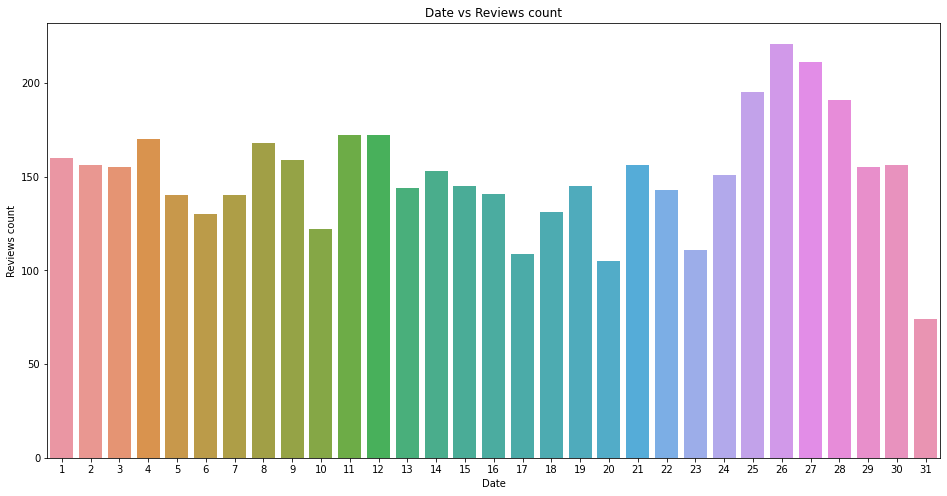

In [412]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

% of Ratings

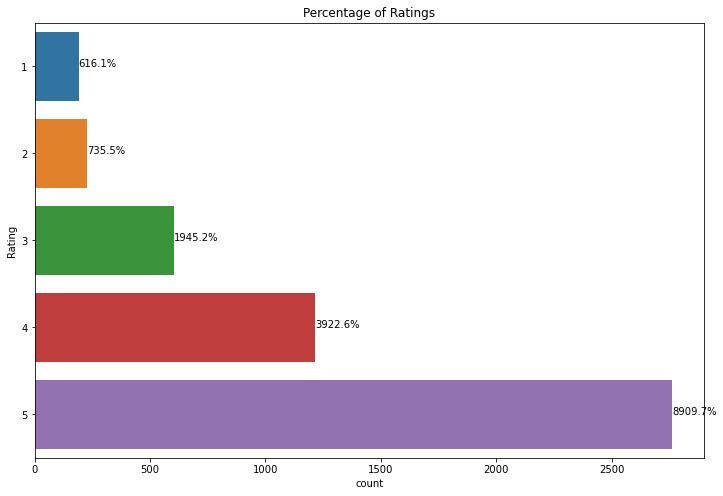

In [305]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = df)
total = len(dayreview)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

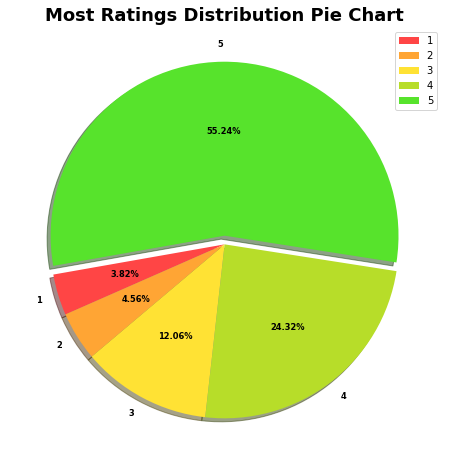

In [275]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

Monthwise Ratings

<AxesSubplot:xlabel='Month'>

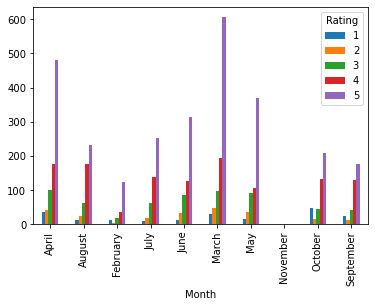

In [300]:
figsize: (12, 8) 
pd.crosstab(df.Month,df.Rating).plot(kind="bar")

# Text Preprocessing

In [413]:
data = df[['Review']]
data

,Review
0,Overall Product is really good. But I've issue...
1,Mobile super good performance mostly branding ...
2,The camera quality is very good
3,Overall phone is very goodCamera quality also ...
4,(Note- I have purchased this phone on the Even...
...,...
4995,1.Its getting too much hot while shooting pics...
4996,Battery discharging quickly. Not even 24 hours
4997,Battery backup worst
4998,"Phone hang and slow , camera quality is not ba..."


In [414]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [415]:
data

,Review
0,overall product really good. but i've issues b...
1,mobile super good performance mostly branding ...
2,the camera quality good
3,overall phone goodcamera quality also nicesmoo...
4,(note- i purchased phone event great indian fe...
...,...
4995,1.its getting much hot shooting pics make vedi...
4996,battery discharging quickly. not even 24 hours
4997,battery backup worst
4998,"phone hang slow , camera quality bad, batery good"


# Cleaning the text by removing irrelevant information

In [310]:
import re #regular expression
import string

def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

# Clean The Text
data["Review"] = data["Review"].apply(clean_text)
data.head()

,Review
0,overall product really good but ive issues bsn...
1,mobile super good performance mostly branding ...
2,the camera quality good
3,overall phone goodcamera quality also nicesmoo...
4,note i purchased phone event great indian fest...


# Word frequency

In [422]:
freq = pd.Series(' '.join(data['Review']).split()).value_counts()[:20] # for top 20
freq

good        2106
phone       1777
camera      1204
battery      929
quality      812
mobile       548
one          521
nice         479
product      368
best         357
like         356
fast         349
oneplus      347
price        344
charging     326
nan          315
life         304
plus         295
also         287
could        279
dtype: int64

In [423]:
# Remove Punctuations

data['Review'] = data['Review'].str.replace('[^\w\s]','')
data['Review'].head()

0    overall product really good ive issues bsnl ne...
1    mobile super good performance mostly branding ...
2                                  camera quality good
3    overall phone goodcamera quality also nicesmoo...
4    note purchased phone event great indian festiv...
Name: Review, dtype: object

In [424]:
# Removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

data['Review'].head()

0    overall product really good ive issues bsnl ne...
1    mobile super good performance mostly branding ...
2                                  camera quality good
3    overall phone goodcamera quality also nicesmoo...
4    note purchased phone event great indian festiv...
Name: Review, dtype: object

In [425]:
# Word frequency after removal of stopwords

freq_SW = pd.Series(' '.join(data['Review']).split()).value_counts()[:20] # for top 20
freq_SW

good        2106
phone       1777
camera      1204
battery      929
quality      812
mobile       548
one          521
nice         479
product      368
best         357
like         356
fast         349
oneplus      347
price        344
charging     326
nan          315
life         304
plus         295
also         287
could        279
dtype: int64

In [426]:
# Removal of Common words

freq = pd.Series(' '.join(data['Review']).split()).value_counts()[:10]
freq

good       2106
phone      1777
camera     1204
battery     929
quality     812
mobile      548
one         521
nice        479
product     368
best        357
dtype: int64

In [427]:
# Removal of Uncommon words

freq = pd.Series(' '.join(data['Review']).split()).value_counts()[-10:]
freq

rethafingerprint    1
onewhile            1
locked              1
worknot             1
256gb               1
usecons             1
command             1
5th                 1
enable              1
leading             1
dtype: int64

# Remove emoji

In [428]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data.head()

,Review
0,overall product really good ive issues bsnl ne...
1,mobile super good performance mostly branding ...
2,camera quality good
3,overall phone goodcamera quality also nicesmoo...
4,note purchased phone event great indian festiv...


In [429]:
# Spelling correction

data['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    overall product really good give issues bone n...
1    mobile super good performance mostly branding ...
2                                  camera quality good
3    overall phone goodcamera quality also nicesmoo...
4    note purchased phone event great indian festiv...
Name: Review, dtype: object

In [430]:
# Frequency List

freq = list(freq.index)
data['Review'] = data['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Review'].head()

0    overall product really good ive issues bsnl ne...
1    mobile super good performance mostly branding ...
2                                  camera quality good
3    overall phone goodcamera quality also nicesmoo...
4    note purchased phone event great indian festiv...
Name: Review, dtype: object

# Tokenization

In [431]:
TextBlob(data['Review'][1]).words

WordList(['mobile', 'super', 'good', 'performance', 'mostly', 'branding', 'oxygen', 'os', 'camera', 'quality'])

# Stemming

In [432]:
from nltk.stem import PorterStemmer
Stm = PorterStemmer()
data['Review'][:10].apply(lambda x: " ".join([Stm.stem(word) for word in x.split()]))

0    overal product realli good ive issu bsnl netwo...
1    mobil super good perform mostli brand oxygen o...
2                                  camera qualiti good
3    overal phone goodcamera qualiti also nicesmoot...
4    note purchas phone event great indian festiv p...
5                             good budget mobil oneplu
6                                          night photo
7                                  good qualiti camera
8    updat version avail phone upgrad flash light t...
9    brand give function speed camera qualiti one p...
Name: Review, dtype: object

# Lemmatization


In [433]:
import nltk
from textblob import Word
data['Review'] = data['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Review'].head()

0    overall product really good ive issue bsnl net...
1    mobile super good performance mostly branding ...
2                                  camera quality good
3    overall phone goodcamera quality also nicesmoo...
4    note purchased phone event great indian festiv...
Name: Review, dtype: object

# Word Frequency using count vectoriser

In [434]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data['Review'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

#print(word_freq_df.sort('occurrences',ascending = False).head())

In [435]:
word_freq_df.head(25)

,term,occurrences,frequency
0,000,1,0.000022
1,010,1,0.000022
2,0100,3,0.000067
3,01002,1,0.000022
4,01005,1,0.000022
5,02,1,0.000022
6,03052022,1,0.000022
7,04052022,1,0.000022
8,05,1,0.000022
9,07052022,1,0.000022


# TFIDF
(Term frequency inverse Document Frequency)

In [436]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data['Review'])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
DF = pd.DataFrame(denselist, columns = names_features)
DF


,10,100,10k,11,12,120hz,128,15,1520,15days,...,wrost,year,yes,yesterday,youtube,zoom,zooming,अचछ,बटर,बहत
0,0.0,0.0,0.0,0.127379,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.215938,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-grams

In [333]:
TextBlob(data['Review'][1]).ngrams(2)

[WordList(['mobile', 'super']),
 WordList(['super', 'good']),
 WordList(['good', 'performance']),
 WordList(['performance', 'mostly']),
 WordList(['mostly', 'branding']),
 WordList(['branding', 'oxygen']),
 WordList(['oxygen', 'o']),
 WordList(['o', 'camera']),
 WordList(['camera', 'quality'])]

# Bi-gram

In [437]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [438]:
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]


In [439]:
top2_words = get_top_n2_words(data["Review"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,camera quality,367
1,one plus,260
2,battery life,244
3,medium could,195
4,could loaded,195


# Plot the Bi-gram

[Text(0, 0, 'camera quality'),
 Text(1, 0, 'one plus'),
 Text(2, 0, 'battery life'),
 Text(3, 0, 'medium could'),
 Text(4, 0, 'could loaded'),
 Text(5, 0, 'good phone'),
 Text(6, 0, 'battery backup'),
 Text(7, 0, 'quality good'),
 Text(8, 0, 'camera good'),
 Text(9, 0, 'fast charging')]

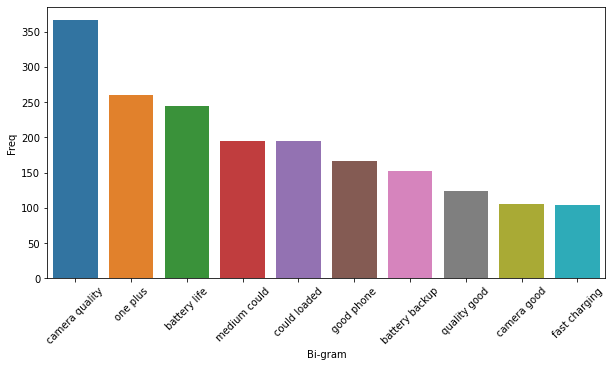

In [440]:
top10_bigram = top2_df.iloc[0:10,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top10_bigram["Bi-gram"],y=top10_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top10_bigram["Bi-gram"])


# Tri-gram

In [441]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [442]:
top3_words = get_top_n3_words(data["Review"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,medium could loaded,195
1,camera quality good,75
2,battery life good,41
3,one plus nord,36
4,good battery life,30


# Plot the Tri-gram

[Text(0, 0, 'medium could loaded'),
 Text(1, 0, 'camera quality good'),
 Text(2, 0, 'battery life good'),
 Text(3, 0, 'one plus nord'),
 Text(4, 0, 'good battery life'),
 Text(5, 0, 'good camera quality'),
 Text(6, 0, 'phone price range'),
 Text(7, 0, 'battery backup good'),
 Text(8, 0, 'could loaded good'),
 Text(9, 0, 'oneplus nord ce')]

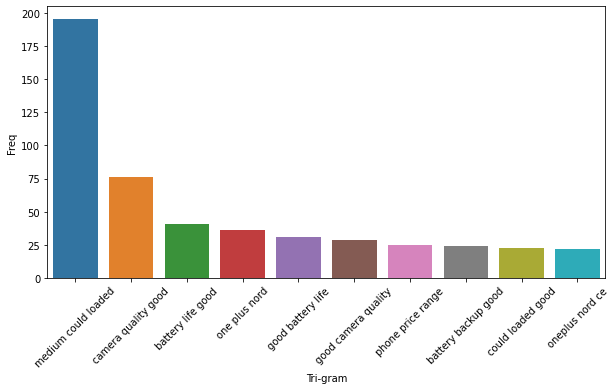

In [341]:
top10_trigram = top3_df.iloc[0:10,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top10_trigram["Tri-gram"],y=top10_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top10_trigram["Tri-gram"])

# WordCloud

In [444]:
string_Total = " ".join(data["Review"])

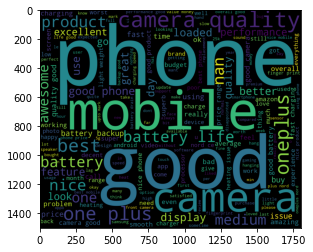

In [445]:
#wordcloud for entire corpus


wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Sentiment Analysis

In [358]:
data["Review"][:10].apply(lambda x: TextBlob(x).sentiment)

0    (0.30606060606060603, 0.4469696969696971)
1     (0.5111111111111111, 0.5888888888888889)
2                    (0.7, 0.6000000000000001)
3                 (0.44999999999999996, 0.475)
4                   (0.7333333333333334, 0.65)
5                    (0.7, 0.6000000000000001)
6                                   (0.0, 0.0)
7                    (0.7, 0.6000000000000001)
8                   (0.3, 0.49444444444444446)
9                                   (0.0, 0.0)
Name: Review, dtype: object

In [446]:
data['sentiment'] = data["Review"].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Review','sentiment']].head(10)

,Review,sentiment
0,overall product really good ive issue bsnl net...,0.306061
1,mobile super good performance mostly branding ...,0.511111
2,camera quality good,0.700000
3,overall phone goodcamera quality also nicesmoo...,0.450000
4,note purchased phone event great indian festiv...,0.733333
5,good budget mobile oneplus,0.700000
6,night photo,0.000000
7,good quality camera,0.700000
8,updated version available phone upgrade flash ...,0.300000
9,brand give function speed camera quality one p...,0.000000


# Subjectivity and polarity

In [448]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)

data.head()

,Review,sentiment,subjectivity,polarity
0,overall product really good ive issue bsnl net...,0.306061,0.446970,0.306061
1,mobile super good performance mostly branding ...,0.511111,0.588889,0.511111
2,camera quality good,0.700000,0.600000,0.700000
3,overall phone goodcamera quality also nicesmoo...,0.450000,0.475000,0.450000
4,note purchased phone event great indian festiv...,0.733333,0.650000,0.733333


# Making a worlcloud

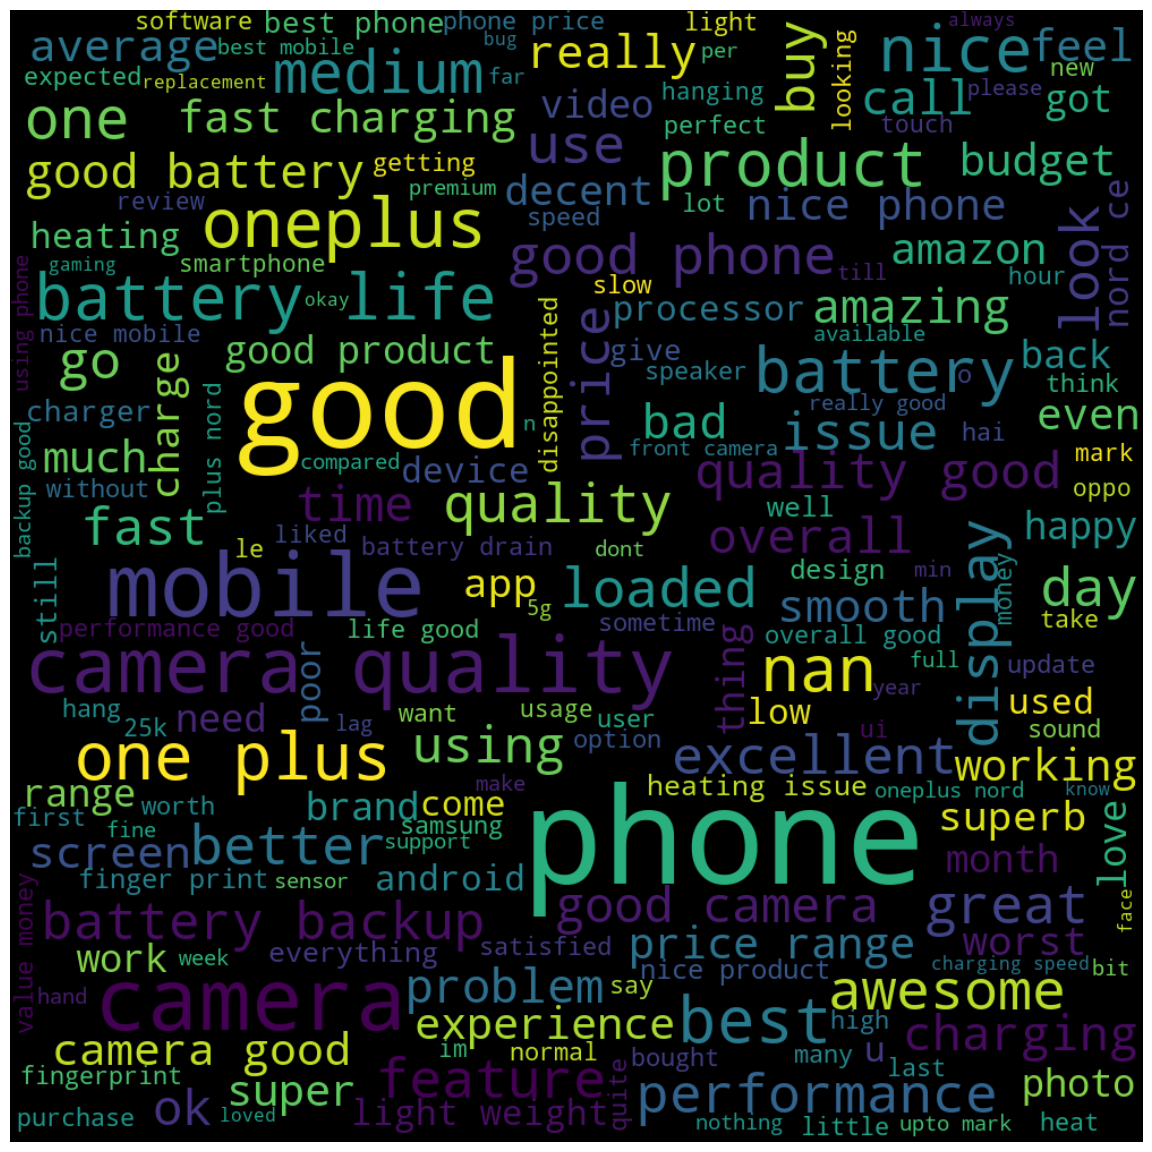

In [449]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in data["Review"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(15, 15), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Compute The Negative, Neutral, Positive Analysis

In [450]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
data["analysis"] = data["polarity"].apply(analysis)
data

,Review,sentiment,subjectivity,polarity,analysis
0,overall product really good ive issue bsnl net...,0.306061,0.446970,0.306061,Positive
1,mobile super good performance mostly branding ...,0.511111,0.588889,0.511111,Positive
2,camera quality good,0.700000,0.600000,0.700000,Positive
3,overall phone goodcamera quality also nicesmoo...,0.450000,0.475000,0.450000,Positive
4,note purchased phone event great indian festiv...,0.733333,0.650000,0.733333,Positive
...,...,...,...,...,...
4995,1its getting much hot shooting pic make vedio2...,0.066667,0.500000,0.066667,Positive
4996,battery discharging quickly even 24 hour,0.333333,0.500000,0.333333,Positive
4997,battery backup worst,-1.000000,1.000000,-1.000000,Negative
4998,phone hang slow camera quality bad batery good,-0.100000,0.555556,-0.100000,Negative


In [451]:
positive_reviews = data[data['analysis'] == 'Positive']
negative_reviews = data[data['analysis'] == 'Negative']

print('positive reviews')
for i, row in positive_reviews[:5].iterrows():
  print(' -' + row['Review'])

print('negative reviews')
for i, row in negative_reviews[:5].iterrows():
  print(' -' + row['Review'])

positive reviews
 -overall product really good ive issue bsnl network particularly productand residential area good network bsnlwith using phone ive experienced poor network connectivity clear sound frequently call get disconnectednb issue network using sim card old poco x2 timethanks team amazon considering issue refunding money people really good genuine6 star serviceive ordered redmi note 11 pro plus 5g amazon
 -mobile super good performance mostly branding oxygen o camera quality
 -camera quality good
 -overall phone goodcamera quality also nicesmoothly workingbattery charging fast best quality phonenow nice phone price
 -note purchased phone event great indian festival putting offer sbi card get within price range 241998 gb ram 128 gb rom variantthis good product budgetable affordable price range oneplus done good jobmy review rating 10camera quality 710battery life 810screen type picture quality 810gaming 610normal use 1010price range 510i hope review help guy get guided purchasi

# Plotting Sentiment Analysis

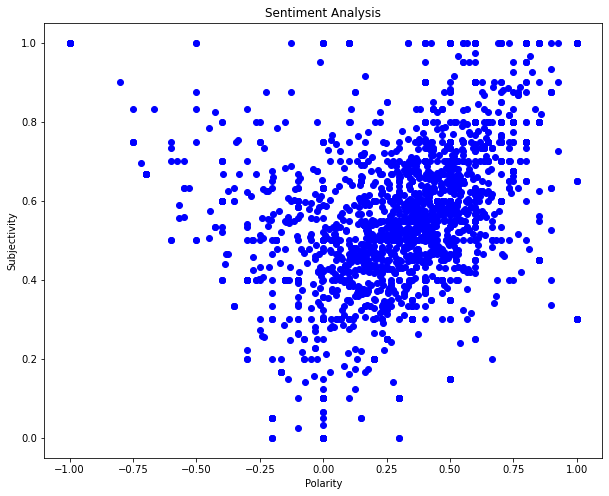

In [456]:
plt.figure(figsize=(10, 8))

for i in range(0, data.shape[0]):
    plt.scatter(data["polarity"][i], data["subjectivity"][i], color = "Blue")

plt.title("Sentiment Analysis") 
plt.xlabel("Polarity")
plt.ylabel("Subjectivity") 
plt.show() 

In [457]:
len(positive_reviews)

3445

In [458]:
len(negative_reviews)

397

In [459]:
len(positive_reviews)/len(negative_reviews)

8.67758186397985

# Conclusion-:

The positive ratio is higher than negetive reviews on the product"realme Narzo 50 Pro 5G". At the end of this analysis we can assume that most of the people like this phone in aspects of it's specification, price and other paramenters which users like to have in their smartphones.